#### Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd          # For data manipulation and pivot tables
import numpy as np           # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For advanced data visualization

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
# your answer here
employee = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Week_Lab\Week 12\lab-pivot-table-correlation\your_code\data\Employee.csv')

# Displaying the first few rows of the dataset to confirm it's loaded correctly
print(employee.head())

     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
# Method 1
# your answer here
# Calculating mean salary by department using groupby
mean_salary_by_dept_groupby = employee.groupby('Department')['Salary'].mean()

# Displaying the result
print("Mean Salary by Department (using groupby):")
print(mean_salary_by_dept_groupby)


Mean Salary by Department (using groupby):
Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [5]:
# Method 2
# your answer here
# Calculating mean salary by department using pivot table
mean_salary_by_dept_pivot = employee.pivot_table(values='Salary', index='Department', aggfunc='mean')

# Displaying the result
print("\nMean Salary by Department (using pivot table):")
print(mean_salary_by_dept_pivot)



Mean Salary by Department (using pivot table):
            Salary
Department        
HR           45.00
IT           48.75
Sales        55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [6]:
# your answer here
# Calculating the mean salary by department and title using pivot table
mean_salary_by_dept_title = employee.pivot_table(values='Salary', index=['Department', 'Title'], aggfunc='mean')

# Displaying the result
print("Mean Salary by Department and Title (using pivot table):")
print(mean_salary_by_dept_title)


Mean Salary by Department and Title (using pivot table):
                      Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
# your answer here
# Calculating mean salary and years of experience by title using a pivot table
mean_values_by_title = employee.pivot_table(
    values=['Salary', 'Years'],          # Values to aggregate
    index='Title',                       # Index by Title
    aggfunc='mean'                       # Aggregation function
)

# Displaying the result
print("Mean Salary and Years of Experience by Title (using pivot table):")
print(mean_values_by_title)


Mean Salary and Years of Experience by Title (using pivot table):
              Salary  Years
Title                      
VP         70.000000   8.00
analyst    32.500000   2.25
associate  56.666667   4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [8]:
# your answer here
# Calculating the mean salary and number of employees by department and title using a pivot table
dept_title_info = employee.pivot_table(
    values='Salary',                    # Value to aggregate
    index=['Department', 'Title'],      # Index by Department and Title
    aggfunc=['mean', 'count']           # Aggregation functions: mean for salary and count for number of employees
)

# Renaming columns for better readability
dept_title_info.columns = ['Mean Salary', 'Number of Employees']

# Displaying the result
print("Mean Salary and Number of Employees by Department and Title (using pivot table):")
print(dept_title_info)


Mean Salary and Number of Employees by Department and Title (using pivot table):
                      Mean Salary  Number of Employees
Department Title                                      
HR         VP                70.0                    1
           analyst           32.5                    2
IT         VP                70.0                    1
           analyst           32.5                    2
           associate         60.0                    1
Sales      associate         55.0                    2


#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [9]:
# your answer here
# Calculating the median, minimum, maximum, and standard deviation of salaries by department and title using a pivot table
salary_stats = employee.pivot_table(
    values='Salary',                                  # Values to aggregate
    index=['Department', 'Title'],                    # Grouping by Department and Title
    aggfunc=['median', 'min', 'max', 'std']           # Aggregation functions
)

# Renaming columns for better readability
salary_stats.columns = ['Median Salary', 'Min Salary', 'Max Salary', 'Salary Std Dev']

# Displaying the result
print("Salary Statistics by Department and Title (using pivot table):")
print(salary_stats)


Salary Statistics by Department and Title (using pivot table):
                      Median Salary  Min Salary  Max Salary  Salary Std Dev
Department Title                                                           
HR         VP                  70.0          70          70             NaN
           analyst             32.5          30          35        3.535534
IT         VP                  70.0          70          70             NaN
           analyst             32.5          30          35        3.535534
           associate           60.0          60          60             NaN
Sales      associate           55.0          55          55        0.000000


#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your answer here

# Calculating global statistics for filling missing values
global_median_salary = employee['Salary'].median()
global_min_salary = employee['Salary'].min()
global_max_salary = employee['Salary'].max()

# Filling missing values in the pivot table
salary_stats_filled = salary_stats.fillna({
    'Median Salary': global_median_salary,  # Fill missing median with global median
    'Min Salary': global_min_salary,        # Fill missing min with global minimum
    'Max Salary': global_max_salary,        # Fill missing max with global maximum
    'Salary Std Dev': 0                     # Fill missing std dev with zero
})

# Displaying the filled pivot table
print("Filled Salary Statistics by Department and Title:")
print(salary_stats_filled)


Filled Salary Statistics by Department and Title:
                      Median Salary  Min Salary  Max Salary  Salary Std Dev
Department Title                                                           
HR         VP                  70.0          70          70        0.000000
           analyst             32.5          30          35        3.535534
IT         VP                  70.0          70          70        0.000000
           analyst             32.5          30          35        3.535534
           associate           60.0          60          60        0.000000
Sales      associate           55.0          55          55        0.000000


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [11]:
# your answer here
# Calculating the number of employees and total salary expenditure by department using a pivot table
dept_summary = employee.pivot_table(
    values='Salary',                     # Values to aggregate
    index='Department',                  # Grouping by Department
    aggfunc=['count', 'sum']             # Aggregating functions: count for employees and sum for total salary
)

# Renaming columns for clarity
dept_summary.columns = ['Number of Employees', 'Total Salary Expenditure']

# Displaying the result
print("Number of Employees and Total Salary Expenditure by Department:")
print(dept_summary)


Number of Employees and Total Salary Expenditure by Department:
            Number of Employees  Total Salary Expenditure
Department                                               
HR                            3                       135
IT                            4                       195
Sales                         2                       110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [12]:
# your answer here
# Calculating the total years of work experience and mean salary by department and title using a pivot table
experience_salary_summary = employee.pivot_table(
    values=['Years', 'Salary'],           # Values to aggregate
    index=['Department', 'Title'],         # Grouping by Department and Title
    aggfunc={'Years': 'sum', 'Salary': 'mean'}  # Aggregation functions: sum for years and mean for salary
)

# Renaming columns for clarity
experience_salary_summary.columns = ['Total Years of Experience', 'Mean Salary']

# Displaying the result
print("Total Years of Experience and Mean Salary by Department and Title:")
print(experience_salary_summary)


Total Years of Experience and Mean Salary by Department and Title:
                      Total Years of Experience  Mean Salary
Department Title                                            
HR         VP                              70.0            8
           analyst                         32.5            6
IT         VP                              70.0            8
           analyst                         32.5            3
           associate                       60.0            7
Sales      associate                       55.0            5


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [20]:
# your answer here
fitbit = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Week_Lab\Week 12\lab-pivot-table-correlation\your_code\data\Fitbit.csv')

# Displaying the first few rows of the dataset to confirm it's loaded correctly
print(fitbit.head())

         Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0  08-05-2015            1934    905      0.65       0              1.355   
1  09-05-2015            3631  18925     14.11       4            611.000   
2  10-05-2015            3204  14228     10.57       1            602.000   
3  11-05-2015            2673   6756      5.02       8            749.000   
4  12-05-2015            2495    502      3.73       1            876.000   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                      46                      0                    0   
1                     316                     61                   60   
2                     226                     14                   77   
3                     190                     23                    4   
4                     171                      0                    0   

   Activity Calories  MinutesOfSleep  MinutesOfBeingAwake  NumberOfAwakings  \
0               168

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [21]:
# your answer here
# Display the data types of each column
print("Data Types:")
print(fitbit.dtypes)


Data Types:
Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


In [25]:
# your answer here
# Display descriptive statistics
print("\nDescriptive Statistics:")
print(fitbit.describe())



Descriptive Statistics:
       Calorie burned         Steps    Distance      Floors  \
count      367.000000    367.000000  367.000000  367.000000   
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max       4351.000000  26444.000000   20.450000  101.000000   

       Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active  \
count         367.000000              367.000000             367.000000   
mean          563.934482              236.405995              26.163488   
std           294.793145               86.531376              20.319456   
min             1.002000                0.000000               0.000000   
25%           520.000000        

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [26]:
# your answer here
# Calculate Pearson correlation between Minutes Very Active and Steps
pearson_corr = fitbit['Minutes Very Active'].corr(fitbit['Steps'], method='pearson')

# Display the result
print(f"Pearson Correlation between Minutes Very Active and Steps: {pearson_corr:.4f}")


Pearson Correlation between Minutes Very Active and Steps: 0.5715


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

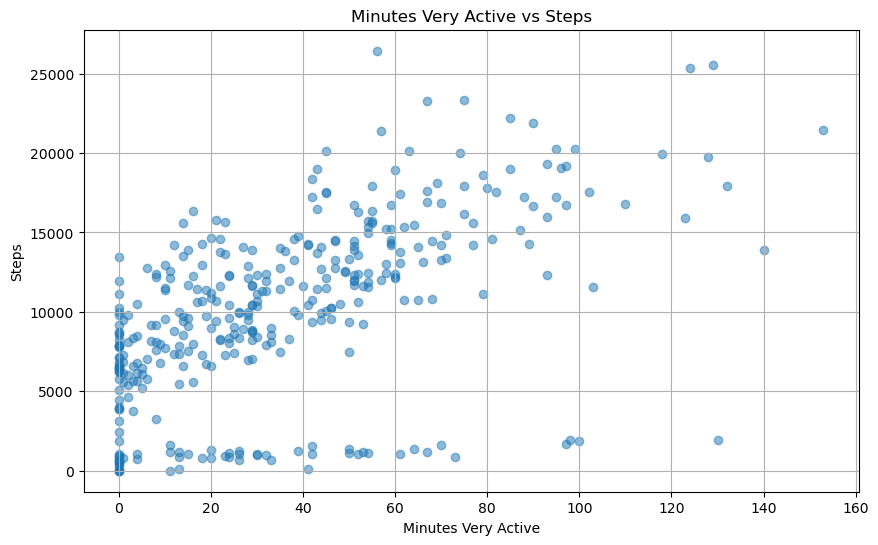

In [27]:
# your answer here
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/navin/OneDrive/Desktop/Ironhack/Week_Lab/Week 12/lab-pivot-table-correlation/your_code/data/Fitbit.csv'
fitbit = pd.read_csv(file_path)

# Scatter plot for Minutes Very Active vs Steps
plt.figure(figsize=(10, 6))
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'], alpha=0.5)
plt.title('Minutes Very Active vs Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.grid(True)
plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
The scatter plot of Minutes Very Active versus Steps shows a positive correlation between the two variables. 
As the number of minutes very active increases, there is a general increase in the number of steps, 
indicating that more active minutes are associated with higher step counts. The points display a relatively clear upward trend,
suggesting a strong linear relationship.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [28]:
# your answer here
# Calculate Pearson correlation between Minutes Sedentary and Steps
pearson_corr_sedentary_steps = fitbit['Minutes Sedentary'].corr(fitbit['Steps'], method='pearson')

# Display the result
print(f"Pearson Correlation between Minutes Sedentary and Steps: {pearson_corr_sedentary_steps:.4f}")

Pearson Correlation between Minutes Sedentary and Steps: 0.0769


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

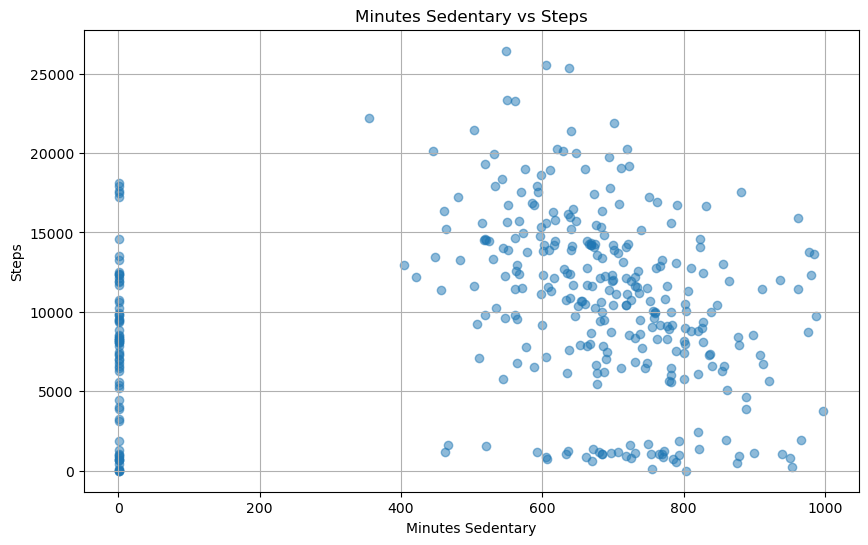

In [29]:
# your answer here
# Scatter plot for Minutes Sedentary vs Steps
plt.figure(figsize=(10, 6))
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'], alpha=0.5)
plt.title('Minutes Sedentary vs Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.grid(True)
plt.show()

The scatter plot of Minutes Sedentary versus Steps shows a clear downward trend, which aligns with the negative Pearson correlation coefficient 
computed between these variables. This means that as the number of minutes spent sedentary increases, the number of steps taken tends to decrease.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [30]:
# your answer here

# Calculate Pearson correlation between MinutesOfSleep and Steps
pearson_corr_sleep_steps = fitbit['MinutesOfSleep'].corr(fitbit['Steps'], method='pearson')

# Display the result
print(f"Pearson Correlation between MinutesOfSleep and Steps: {pearson_corr_sleep_steps:.4f}")


Pearson Correlation between MinutesOfSleep and Steps: 0.1310


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

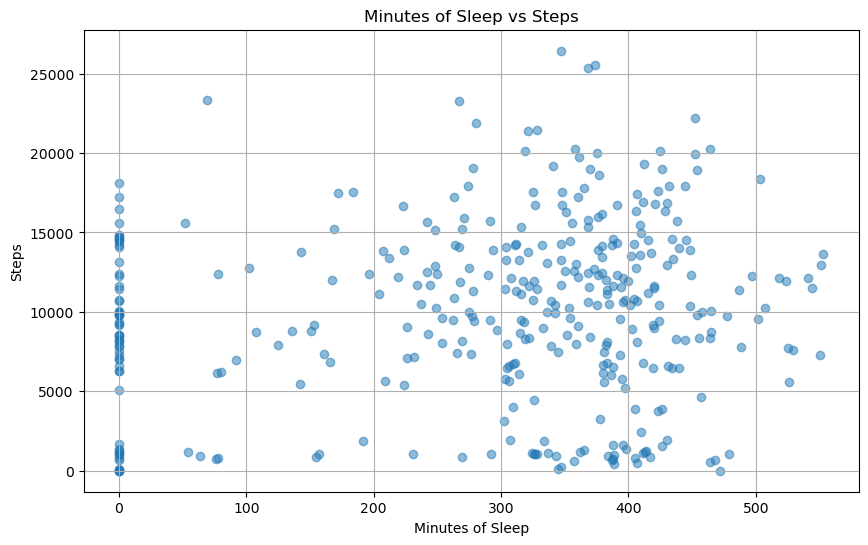

In [31]:
# your answer here
# Scatter plot for MinutesOfSleep vs Steps
plt.figure(figsize=(10, 6))
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'], alpha=0.5)
plt.title('Minutes of Sleep vs Steps')
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps')
plt.grid(True)
plt.show()

the correlation coefficient is negative and the scatter plot shows a downward trend, it indicates that as the minutes of sleep increase, 
the number of steps taken tends to decrease, reflecting a negative linear relationship.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# your answer here
# Define the list of columns
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

# Select the subset of the dataset
subset_fitbit = fitbit[columns]


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [16]:
# your answer here
time_grades = pd.read_csv(r'C:\Users\navin\OneDrive\Desktop\Ironhack\Week_Lab\Week 12\lab-pivot-table-correlation\your_code\data\Time_Grades.csv')

# Displaying the first few rows of the dataset to confirm it's loaded correctly
print(time_grades.head())

     Name  Study time  Grade
0    Jose           4      4
1   Maria           9      7
2   David           8      9
3   Sonia          10      7
4  Samuel          20      9


#### Show visually the frequency distribution of the time_grades dataset.

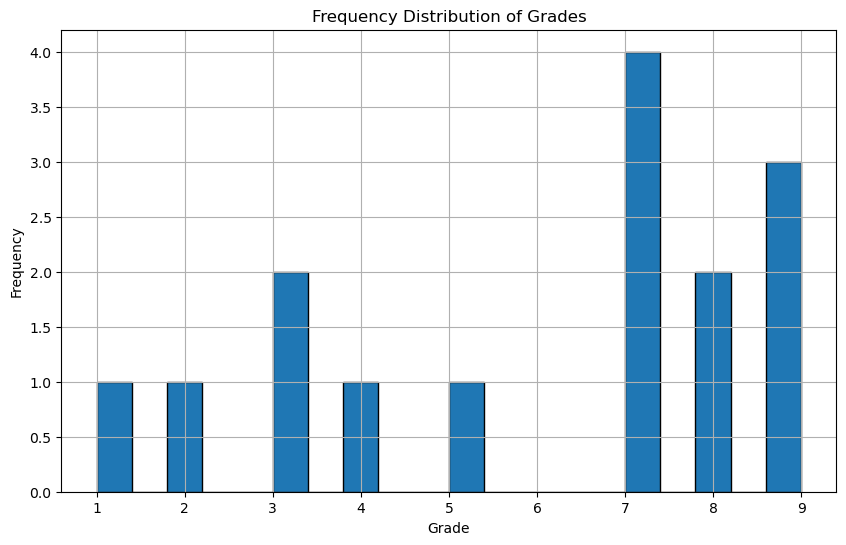

In [17]:
# your answer here
import matplotlib.pyplot as plt

# Plotting the frequency distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(time_grades['Grade'], bins=20, edgecolor='black') 
plt.title('Frequency Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [ ]:
# your answer here


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [19]:
# your answer here
# Compute Pearson correlation
pearson_corr = time_grades['Study time'].corr(time_grades['Grade'], method='pearson')

# Compute Spearman correlation
spearman_corr = time_grades['Study time'].corr(time_grades['Grade'], method='spearman')

# Displaying the results
print(f"Pearson Correlation between Study Time and Grade: {pearson_corr:.4f}")
print(f"Spearman Correlation between Study Time and Grade: {spearman_corr:.4f}")

#In this case both Pearson and Spearman correlations are high (close to 1), it suggests that as study time increases, grades tend to increase, and this relationship is both linear and monotonic.

Pearson Correlation between Study Time and Grade: 0.7980
Spearman Correlation between Study Time and Grade: 0.8197


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
earson correlation measures the linear relationship between two continuous variables. It assesses how well the relationship between the variables can be described by a straight line where as Spearman correlation measures the strength and direction of the monotonic relationship between two variables. Unlike Pearson, it does not require the relationship to be linear.